# 这里用线性回归模型看一下结果

简单测试，虽然老师不让用nn，这里先用nn试一下，方便我们调出最好的结果，然后再从底层去实现去看一下效果

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l
from Model import *
from Trainer import *
from torchinfo import summary
import os

### 加载数据

In [2]:
mydir = os.getcwd() + '\\data01'

# 读取本地文件
train_features = torch.load('{}/train_features.pt'.format(mydir))
test_features = torch.load('{}/test_features.pt'.format(mydir))
train_labels = torch.load('{}/train_labels.pt'.format(mydir))
test_data = pd.read_csv('{}/test_data.csv'.format(mydir))

In [3]:
print("train_features.shape: ", train_features.shape)
print("test_features.shape: ", test_features.shape)
print("train_labels.shape: ", train_labels.shape)
print("test_data.shape: ", test_data.shape)

train_features.shape:  torch.Size([1460, 331])
test_features.shape:  torch.Size([1459, 331])
train_labels.shape:  torch.Size([1460, 1])
test_data.shape:  (1459, 81)


### 定义损失函数

In [4]:
def squared_loss(preds, labels):  #@save
    """均方损失。"""
    return (preds - labels.reshape(preds.shape)) ** 2

def log_rmse(preds, labels):  #@save
    """对数均方根误差。"""
    return squared_loss(torch.log(preds+1), torch.log(labels+1)).mean()

In [5]:
# 定义超参数
learning_rate = 0.01 # 学习率
model=LinearNet(train_features.shape[-1],1) # 线性回归模型
loss_fn=log_rmse
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # Adam优化器
# optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate) # 随机梯度下降优化器，学习率为0.01

In [6]:
summary(model, input_size=(64,331))

Layer (type:depth-idx)                   Output Shape              Param #
LinearNet                                [64, 1]                   --
├─Linear: 1-1                            [64, 1]                   332
Total params: 332
Trainable params: 332
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.08
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

In [7]:
mytrainer = Trainer(
    model= model, # 模型
    X=train_features, # 特征
    y=train_labels, # 标签
    num_epochs=600, # 迭代次数
    batch_size=16, # 批次大小为16
    loss_fn= loss_fn, # 损失函数
    optimizer= optimizer, # 优化器
    n_splits=5, # 子集个数
    is_print=True,
    print_every=50
)

In [8]:
mytrainer.train()

Fold 0
Epoch | 50/600 | Train Loss: 42.2092 | Test Loss: 42.5595
Epoch | 100/600 | Train Loss: 31.1001 | Test Loss: 31.3659
Epoch | 150/600 | Train Loss: 23.3725 | Test Loss: 23.5828
Epoch | 200/600 | Train Loss: 18.1764 | Test Loss: 18.3433
Epoch | 250/600 | Train Loss: 14.8122 | Test Loss: 14.9506
Epoch | 300/600 | Train Loss: 12.5233 | Test Loss: 12.6431
Epoch | 350/600 | Train Loss: 10.8612 | Test Loss: 10.9680
Epoch | 400/600 | Train Loss: 9.5901 | Test Loss: 9.6872
Epoch | 450/600 | Train Loss: 8.5802 | Test Loss: 8.6696
Epoch | 500/600 | Train Loss: 7.7542 | Test Loss: 7.8373
Epoch | 550/600 | Train Loss: 7.0635 | Test Loss: 7.1412
Epoch | 600/600 | Train Loss: 6.4755 | Test Loss: 6.5487
Fold 1
Epoch | 50/600 | Train Loss: 39.5212 | Test Loss: 39.7638
Epoch | 100/600 | Train Loss: 29.4201 | Test Loss: 29.6158
Epoch | 150/600 | Train Loss: 22.2544 | Test Loss: 22.4148
Epoch | 200/600 | Train Loss: 17.4640 | Test Loss: 17.5948
Epoch | 250/600 | Train Loss: 14.3399 | Test Loss: 14.

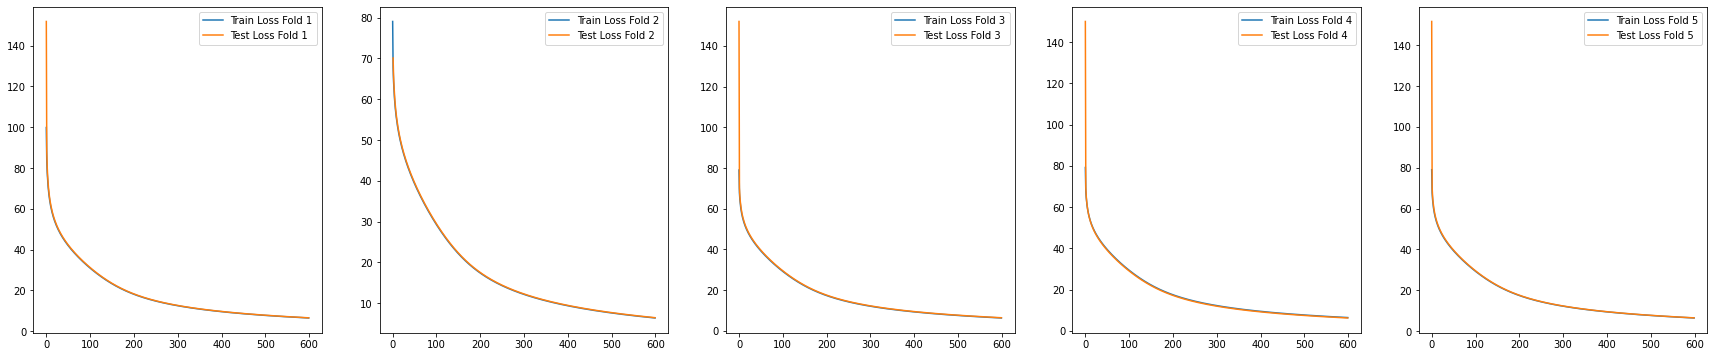

In [9]:
mytrainer.visualize()

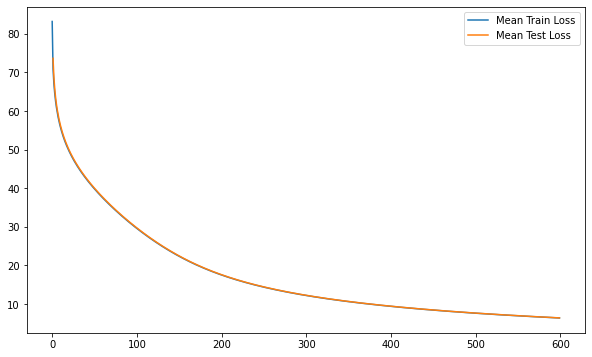

In [10]:
mytrainer.plot_mean_loss()

In [11]:
preds = mytrainer.predict(test_features)
print("preds.shape: ", preds.shape)
print("preds[:10]: ", preds[:10])

preds.shape:  torch.Size([1459])
preds[:10]:  tensor([13215.7490, 13103.7441, 14262.3154, 14516.9150, 13648.9014, 14228.2178,
        13852.1885, 14251.3662, 14116.1494, 13367.2607])


In [12]:
test_features[:5]

tensor([[-0.8735,  0.4581,  0.1843,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.5009,  0.5197,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.2011,  0.4643,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673,  0.3724, -0.0241,  ...,  1.0000,  0.0000,  0.0000],
        [ 1.4785, -1.1268, -0.6546,  ...,  1.0000,  0.0000,  0.0000]])

In [13]:
train_features[:5]

tensor([[ 0.0673, -0.1844, -0.2178,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  0.4581, -0.0720,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.0673, -0.0559,  0.1372,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.3025, -0.3986, -0.0784,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0673,  0.6294,  0.5188,  ...,  1.0000,  0.0000,  0.0000]])

In [14]:
train_preds = mytrainer.predict(train_features)

In [15]:
print("train_preds[:10]: \n", train_preds[:10])
print("train_labels[:10]: \n", train_labels[:10])

train_preds[:10]: 
 tensor([14422.9658, 13704.9502, 14438.9971, 13352.2734, 14925.5674, 13955.7070,
        14707.9717, 13749.0742, 12798.0488, 12107.6123])
train_labels[:10]: 
 tensor([[208500.],
        [181500.],
        [223500.],
        [140000.],
        [250000.],
        [143000.],
        [307000.],
        [200000.],
        [129900.],
        [118000.]])


In [16]:
test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
submission.to_csv('submission1.csv', index=False)

在colab上也训练了一份，结果不太理想；

![submission](submission1.png)